## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Combine the data into a single dataset.  
study_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_unique_mice = len(study_df['Mouse ID'].unique())
num_unique_mice

249

In [3]:
# Getting the duplicate mice by ID number that show up for Mouse ID and Timepoint.
# Look for duplicate Mouse ID/Timepoint occurrences
duplicateMouseRow = study_df[study_df.duplicated(['Mouse ID','Timepoint'])]
print(duplicateMouseRow)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# check out all rows for that Mouse ID
filtered_data = study_df[study_df["Mouse ID"]=='g989']
print(filtered_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
mouse_index_list = filtered_data.index

print(mouse_index_list)
len(mouse_index_list)

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')


13

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_df.drop(mouse_index_list, inplace=True)

In [7]:
# check out all rows for that Mouse ID
filtered_data = study_df[study_df["Mouse ID"]=='g989']
print(filtered_data)

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


In [8]:
# Checking the number of mice in the clean DataFrame to make sure it is one less than before the drop.
num_unique_mice = len(study_df['Mouse ID'].unique())
num_unique_mice

248

## Summary Statistics

In [14]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Group by drug regimen
regimen_group = study_df.groupby(["Drug Regimen"])

# Calculate the mean
regimen_mean = regimen_group['Tumor Volume (mm3)'].mean()

# Calculate the median
regimen_median = regimen_group['Tumor Volume (mm3)'].median()

# calculate the variance
regimen_variance = regimen_group['Tumor Volume (mm3)'].var()
#regimen_variance = np.var(regimen_group['Tumor Volume (mm3)'])

# calculate the variance
regimen_std = regimen_group['Tumor Volume (mm3)'].std()
regimen_std.head(20)

# Calculate the SEM
regimen_sem = regimen_group['Tumor Volume (mm3)'].sem()
regimen_sem.head(20)


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Assemble the resulting series into a single summary dataframe.
summary_stats1_df = pd.DataFrame({   'Mean Tumor Volume': regimen_mean,
                                     'Median Tumor Volume': regimen_median,
                                     'Tumor Volume Variance': regimen_variance,
                                     'Tumor Volume Std Dev': regimen_std,
                                     'Tumor Volume SEM': regimen_sem
                                })
summary_stats1_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats2_df = regimen_group.agg(
                                    {
                                        'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']
                                    })
summary_stats2_df.head(20)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

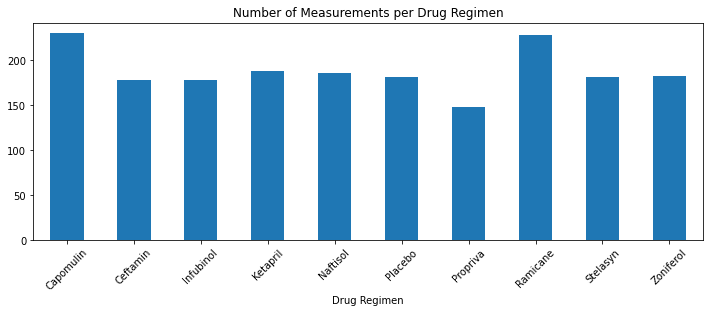

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Create the dataframe by doing a count of measurements on the Groupby object created in the previous section 
regimen_num_measurements = regimen_group['Timepoint'].count()

# Plot it, set a title & display the chart
regimen_num_measurements.plot(kind="bar", figsize=(12,4), rot=45)
plt.title("Number of Measurements per Drug Regimen")
plt.show()
#plt.tight_layout()

In [19]:
drug_list = list(regimen_num_measurements.index)
print(drug_list)

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


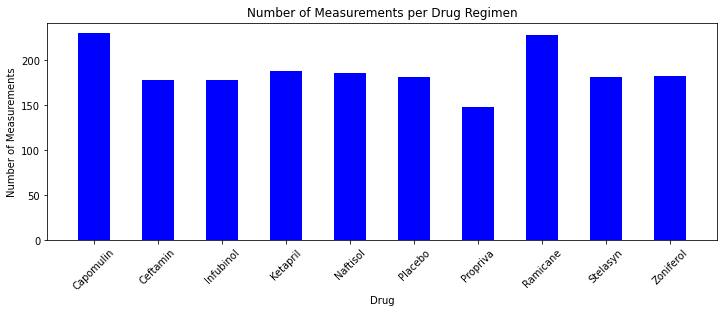

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Set up the x and y axis values
x_axis = np.arange(len(regimen_group))
y_axis = regimen_num_measurements.values.tolist()
#y_axis = list(regimen_num_measurements['Drug Regimen'])
plt.figure(figsize=(12,4))
plt.bar(x_axis, y_axis, color ='b', align='center', width=0.5)

# Tell pyplot where we would like to place each of our x axis headers
#x_headers = regimen_group['Drug Regimen'].unique()
drug_list = list(regimen_num_measurements.index)
plt.xticks(x_axis, drug_list, rotation=45)

# Give our chart some labels and a tile
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug")
plt.ylabel("Number of Measurements")
plt.show()

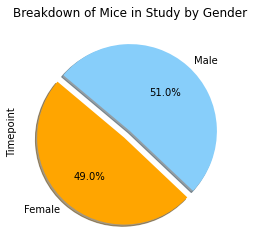

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Group by gender, and do a count of timepoints by gender
gender_group = study_df.groupby(["Sex"])

# Create a dataframe by doing a count of measurements on this Groupby object 
gender_df = gender_group['Timepoint'].count()

# set up plotting variables
colors = ['orange','lightskyblue']
explode = [0.1,0]

# Plot it, set a title & display the chart
gender_df.plot(kind="pie", colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Breakdown of Mice in Study by Gender")
plt.show()
#plt.tight_layout()


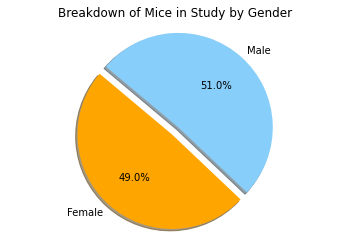

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group by gender, and do a count of timepoints by gender
gender_group = study_df.groupby(["Sex"])

# Create a dataframe by doing a count of measurements on this Groupby object 
gender_df = gender_group['Timepoint'].count()

# Set up charting variables
genders = gender_df.index
measurements = gender_group['Timepoint'].count()
colors = ['orange','lightskyblue']
explode = [0.1,0]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(measurements, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Breakdown of Mice in Study by Gender")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [33]:
# create a table containing the max timepoint for each mouse (this is ugly method chaining but I haven't found another way)
max_timepoints_df = pd.DataFrame(study_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})

# merge the max timepoint with our original df
augmented_df = pd.merge(study_df, max_timepoints_df, on = 'Mouse ID')
augmented_df.head()

# create subset df with only one timepoint record per mouse - the last one
drug_df = augmented_df.loc[augmented_df['Timepoint'] == augmented_df['max_timepoint']]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [68]:
# Calculate the quartiles and IQR for each drug regimen and determine whether there are any outliers 

# Capomulin
capomulin_extract = drug_df.loc[drug_df['Drug Regimen']=='Capomulin']
capomulin_extract.reset_index()
capomulin_volumes = capomulin_extract['Tumor Volume (mm3)']
capomulin_volumes.reset_index()

quartiles = capomulin_volumes.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q
lower_bound = lower_q - (1.5 * iqr)
upper_bound = upper_q + (1.5 * iqr)
#outlier_count = (capomulin_volumes.loc[(capomulin_volumes['Tumor Volume (mm3)'] > upper_bound) |
#                                     (capomulin_volumes['Tumor Volume (mm3)'] < lower_bound)]).count()

outlier_count = (capomulin_volumes.loc[(capomulin_extract['Tumor Volume (mm3)'] > upper_bound) |
                                    (capomulin_extract['Tumor Volume (mm3)'] < lower_bound)]).count()
print(f'IQR for Capomulin is {iqr}')
print(f'Upper bound for Capomulin is {upper_bound}')
print(f'Lower bound for Capomulin is {lower_bound}')  
print(f'Number of outliers for Capomulin is {outlier_count}')
print()

IQR for Capomulin is 7.781863460000004
Upper bound for Capomulin is 51.83201549
Lower bound for Capomulin is 20.70456164999999
Number of outliers for Capomulin is 0



In [69]:
# Calculate the quartiles and IQR for each drug regimen and determine whether there are any outliers 

# Ramicane
ramicane_extract = drug_df.loc[drug_df['Drug Regimen']=='Ramicane']
ramicane_extract.reset_index()
ramicane_volumes = ramicane_extract['Tumor Volume (mm3)']
ramicane_volumes.reset_index()

quartiles = ramicane_volumes.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q
lower_bound = lower_q - (1.5 * iqr)
upper_bound = upper_q + (1.5 * iqr)
outlier_count = (ramicane_volumes.loc[(ramicane_extract['Tumor Volume (mm3)'] > upper_bound) |
                                    (ramicane_extract['Tumor Volume (mm3)'] < lower_bound)]).count()
print(f'IQR for Ramicane is {iqr}')
print(f'Upper bound for Ramicane is {upper_bound}')
print(f'Lower bound for Ramicane is {lower_bound}')  
print(f'Number of outliers for Ramicane is {outlier_count}')
print()

IQR for Ramicane is 9.098536719999998
Upper bound for Ramicane is 54.30681135
Lower bound for Ramicane is 17.912664470000003
Number of outliers for Ramicane is 0



In [70]:
# Calculate the quartiles and IQR for each drug regimen and determine whether there are any outliers 

# Infubinol
infubinol_extract = drug_df.loc[drug_df['Drug Regimen']=='Infubinol']
infubinol_extract.reset_index()
infubinol_volumes = infubinol_extract['Tumor Volume (mm3)']
infubinol_volumes.reset_index()

quartiles = infubinol_volumes.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q
lower_bound = lower_q - (1.5 * iqr)
upper_bound = upper_q + (1.5 * iqr)
outlier_count = (infubinol_volumes.loc[(infubinol_extract['Tumor Volume (mm3)'] > upper_bound) |
                                    (infubinol_extract['Tumor Volume (mm3)'] < lower_bound)]).count()
print(f'IQR for Infubinol is {iqr}')
print(f'Upper bound for Infubinol is {upper_bound}')
print(f'Lower bound for Infubinol is {lower_bound}')  
print(f'Number of outliers for Infubinol is {outlier_count}')
print()

IQR for Infubinol is 11.477135160000003
Upper bound for Infubinol is 82.74144559000001
Lower bound for Infubinol is 36.83290494999999
Number of outliers for Infubinol is 1



In [71]:
# Calculate the quartiles and IQR for each drug regimen and determine whether there are any outliers 

# Ceftamin
ceftamin_extract = drug_df.loc[drug_df['Drug Regimen']=='Ceftamin']
ceftamin_extract.reset_index()
ceftamin_volumes = ceftamin_extract['Tumor Volume (mm3)']
ceftamin_volumes.reset_index()

quartiles = ceftamin_volumes.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q
lower_bound = lower_q - (1.5 * iqr)
upper_bound = upper_q + (1.5 * iqr)
outlier_count = (ceftamin_volumes.loc[(ceftamin_extract['Tumor Volume (mm3)'] > upper_bound) |
                                    (ceftamin_extract['Tumor Volume (mm3)'] < lower_bound)]).count()
print(f'IQR for Ceftamin is {iqr}')
print(f'Upper bound for Ceftamin is {upper_bound}')
print(f'Lower bound for Ceftamin is {lower_bound}')  
print(f'Number of outliers for Ceftamin is {outlier_count}')
print()

IQR for Ceftamin is 15.577752179999997
Upper bound for Ceftamine is 87.66645829999999
Lower bound for Ceftamin is 25.355449580000002
Number of outliers for Ceftamin is 0



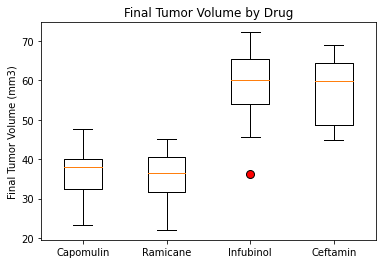

In [76]:
# generate a box plot of the final tumor volume of each mouse across all four drug regimens
# highlight any outliers so they stand out
flierprops = dict(marker='o', markerfacecolor='r',markersize=8, markeredgecolor='black')
plt.boxplot ([capomulin_volumes, ramicane_volumes, infubinol_volumes, ceftamin_volumes],flierprops=flierprops)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4], ['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.show()

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
